In [1]:
import pandas as pd

# Loading the dataset 
data = pd.read_csv("advertising.csv")

In [2]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

X = data[["TV","Radio","Newspaper"]]
y= data["Sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Training the KNN model
k = 9 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

In [9]:
new_data = pd.DataFrame({
    'TV': [100.4],
    'Radio': [9.6],
    'Newspaper': [3.6]
})
predictions = knn_model.predict(new_data)
print("Predictions:", predictions)

Predictions: [12.54444444]


In [10]:
new_data = pd.DataFrame({
    'TV': [7.3],
    'Radio': [28.1],
    'Newspaper': [40]
})
predictions = knn_model.predict(new_data)
print("Predictions:", predictions)

Predictions: [7.08888889]


In [11]:
from sklearn.metrics import r2_score

# Calculating R-squared score, which indicates the accuracy of the KNN model's predictions
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)

R-squared score: 0.9110796167670087


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

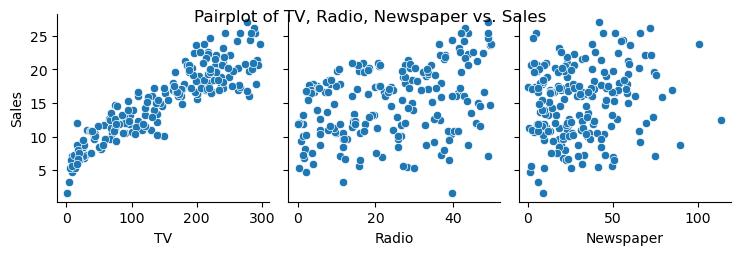

In [13]:
# Pairplot to visualize pairwise relationships
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], kind='scatter')
plt.suptitle("Pairplot of TV, Radio, Newspaper vs. Sales")
plt.show()


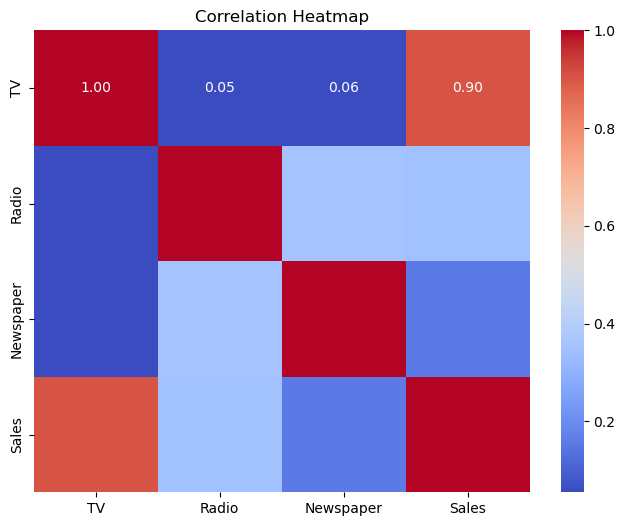

In [14]:
# Heatmap to visualize correlation
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


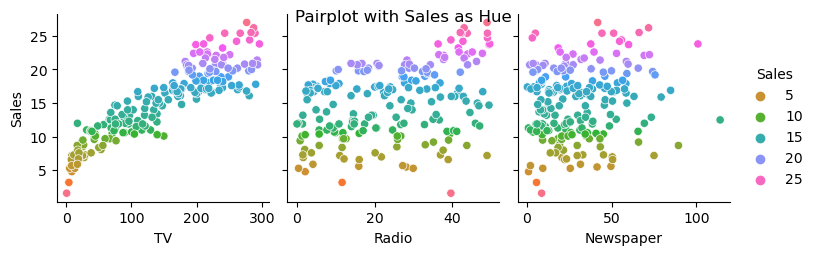

In [15]:
# Pairplot with hue based on Sales
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], kind='scatter', hue="Sales", palette="husl")
plt.suptitle("Pairplot with Sales as Hue")
plt.show()